In [1]:
%matplotlib notebook
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
from bdots import *
import pickle
from matplotlib import rc

In [2]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS\s0215_17 12 frame"

s=OpticalFrames(160,20)
s.logarithm()
s.rotate(-90)
#s.plot_rot(frame=2)

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS\s0215_17 12 frame


..\magpie_data.py:329: RuntimeWarning: divide by zero encountered in log


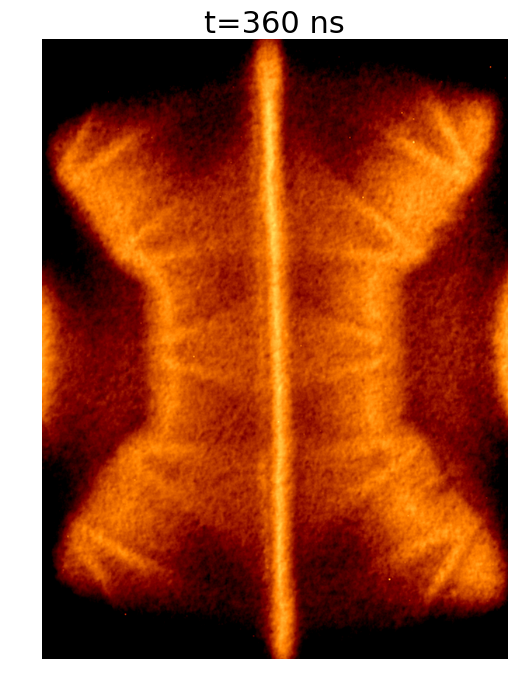

In [7]:
s.crop((465,406), xcrop=300, ycrop=400)
fig,ax=plt.subplots(figsize=(6,8))
s.plot_crop(ax=ax, frame=11, clim=[0.5,1.2])

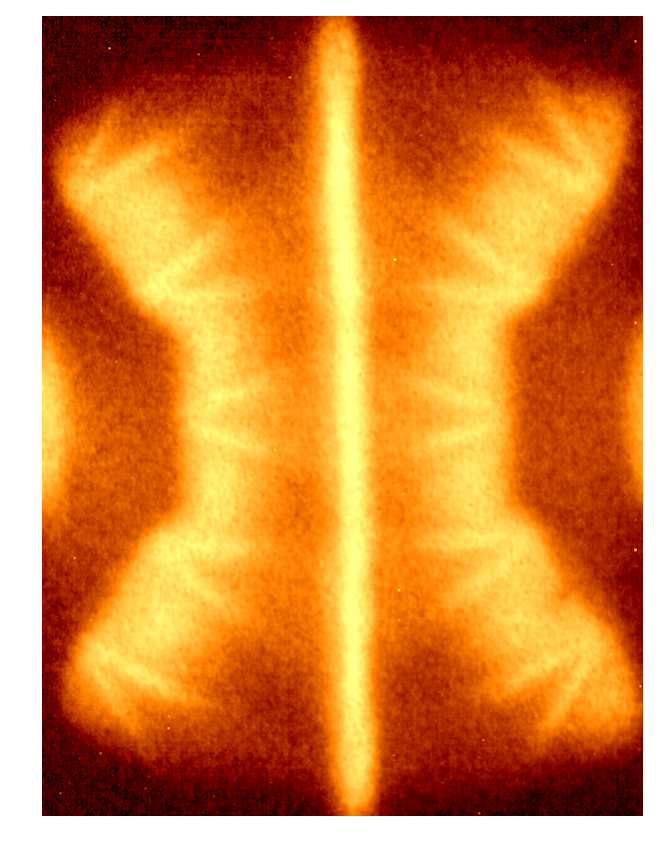

In [4]:
%matplotlib inline
s.save_gif(s.shot+' 12 frame',clim=[0,1.2])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:329: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


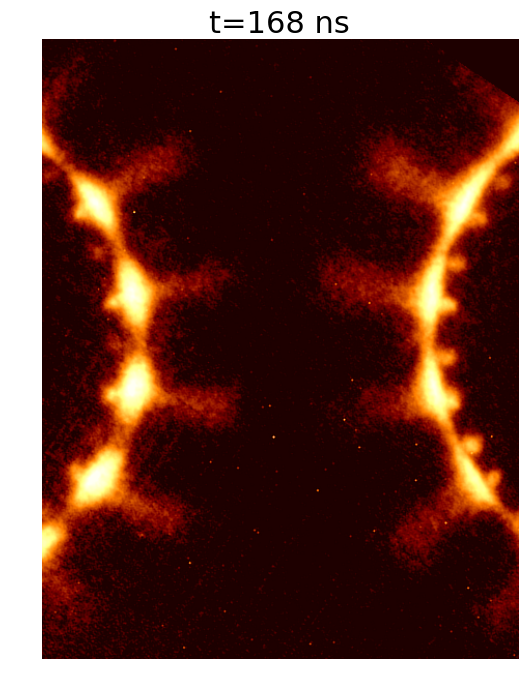

In [38]:
%cd "~\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted
s=OpticalFrames(168,20)
s.logarithm()
s.rotate(-90+56)
s.crop((512,608), xcrop=230, ycrop=300)
s.plot_crop()

In [ ]:
%matplotlib inline
s.save_gif(s.shot+' 12 frame',clim=[0,1])

In [444]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


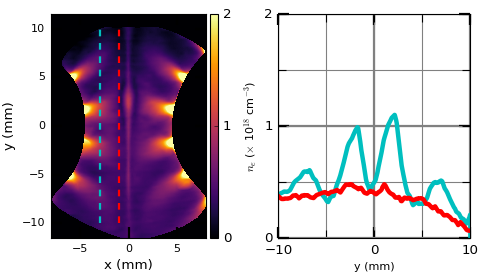

(3719, 882) (259, 882)
(3719, 1211) (259, 1211)


(-10, 10)

In [450]:
fig, ax=plt.subplots(1,2, figsize=(6, 3.5))
ax1=ax[0]
gim=s1006_15_532.plot_data_mm(ax=ax1, clim=[0,2], multiply_by=1e-18)

for x_mm in [-2.9,-1]:
    ax1.plot([x_mm,x_mm],[-10,10], lw=2, ls='dashed')
ax1.lines[0].set_color('c')
ax1.lines[1].set_color('red')


ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
ax1.set_xticks([-5,0,5])

ax1.set_xlim([-8,8])
ax1.set_ylim([-11.5,11.5])


ax1.tick_params(labelsize=10, pad=5, length=10, width=2)


divider1 = make_axes_locatable(ax1)
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(gim, cax=c, ticks=[0,1 ,2])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10, labelpad=10)

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.08, right=0.98, wspace=0.25, hspace=0)

ax3=ax[1]
s=s1006_15_532

for x_mm in [-2.9,-1]:
    s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=10)
    s.plot_lineout(ax=ax3, label="x= "+str(x_mm)+" mm",multiply_by=1e-18)
    
ax3.lines[0].set_color('c')
ax3.lines[1].set_color('red')

ax3.set_xticks([-10,0,10])
ax3.xaxis.set_minor_locator(MultipleLocator(5))
ax3.set_ylim([0, 2])
ax3.set_yticks([0, 1,2])
ax3.yaxis.set_minor_locator(MultipleLocator(0.5))

ax3.grid(which='major', color='gray', linestyle='-', linewidth=2)
ax3.grid(which='minor', color='gray', linestyle='-', linewidth=1)
ax3.set_axisbelow(True)


ax3.tick_params(which='minor', pad=5, length=7, width=1)
ax3.tick_params( pad=5, length=10, width=2)

ax3.set_xlabel('y (mm)',fontsize=10)
ax3.set_xlim([-10,10])



In [451]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='lineouts_inflow_density.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


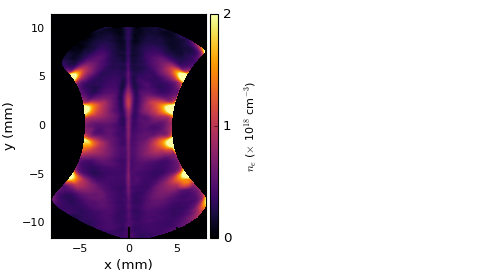

In [448]:
fig, ax=plt.subplots(1,2, figsize=(6, 3.5))
ax1=ax[0]
gim=s1006_15_532.plot_data_mm(ax=ax1, clim=[0,2], multiply_by=1e-18)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
ax1.set_xticks([-5,0,5])

ax1.set_xlim([-8,8])
ax1.set_ylim([-11.5,11.5])


ax1.tick_params(labelsize=10, pad=5, length=10, width=2)


divider1 = make_axes_locatable(ax1)
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(gim, cax=c, ticks=[0,1 ,2])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10, labelpad=10)

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.08, right=0.98, wspace=0.25, hspace=0)

ax[1].set_axis_off()

In [449]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='ne_map_with_whitespace.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Thomson

In [3]:
import csv
class TS_fibre_data:
    def __init__(self, fn):
        shift=[]
        Background=[]
        Response=[]
        Shot=[]
        Fit=[]

        with open(fn, 'r',newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader)
            next(reader)
            for row in reader:
                shift.append(float(row[0]))
                Background.append(float(row[1]))
                Response.append(float(row[2]))
                Shot.append(float(row[3]))
                Fit.append(float(row[4]))

        self.shift=np.asarray(shift)
        self.Background=np.asarray(Background)
        self.Response=np.asarray(Response)
        self.Shot=np.asarray(Shot)
        self.Fit=np.asarray(Fit)

In [4]:
%cd "~\Documents\GitHub\magpie-analysis\Thomson\Exported Data"
Hot=TS_fibre_data("s0817_16 10A.dat")
Cold=TS_fibre_data("s0811_16 9A.dat")

C:\Users\jdhare\Documents\GitHub\magpie-analysis\Thomson\Exported Data


<IPython.core.display.Javascript object>


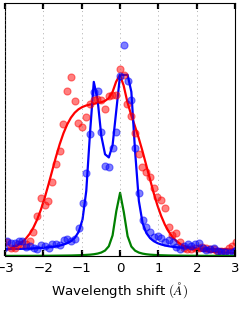

In [39]:
fig,a=plt.subplots(figsize=(6,4))

f=Cold
r=0.3*f.Shot.max()/f.Response.max()
a.plot(f.shift, f.Response*r, lw=2, color='green', label='Response')


for f,c,l in zip([Hot, Cold], ['red', 'blue'], ['Before collapse', 'After collapse']):
    a.plot(f.shift, f.Fit, lw=2, color=c,zorder=1)
    a.scatter(f.shift, f.Shot, color=c, marker='o', s=40, label=l,zorder=2, alpha=0.5)

a.set_ylim([0,None])
a.tick_params(labelsize=12, pad=5, length=5, width=2)
a.set_yticks([])

a.set_xlim([-3,3])

a.xaxis.set_minor_locator(MultipleLocator(1))
a.grid(which='minor', color='gray',linestyle=':')

a.set_xlabel(r'Wavelength shift $(\AA)$', fontsize=12)

a.legend(fontsize=12)

fig.subplots_adjust(bottom=0.2, top=0.99,left=0.02, right=0.98)

In [40]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='thomson_radiative_collapse_thin.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Out of plane field

In [41]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday"
R0fn="s0701_16_102155_c1.png"
R1fn="s0701_16_102202_c2.png"
B0fn="s0701_16_103044_c1.png"
B1fn="s0701_16_103051_c2.png"
S0fn="s0701_16_112804_c1.png"
S1fn="s0701_16_112811_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-90)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday


In [42]:
t=pickle.load(open("s0701_16 faraday registration.p", "rb"))
s.register(transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [43]:
s.scale=59
extent=[-13,13,-9,9]
s.set_origin((1853,1287), extent=extent)

In [57]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday"
I0fn="s0701_16 IR end on interferometry (2).JPG"
nefn="s0701_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday


C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [58]:
t=pickle.load(open("s0701_16 interferometry transform.p", "rb"))
b.register(transform=t)

..\magpie_data.py:235: RuntimeWarning: divide by zero encountered in true_divide
..\magpie_data.py:235: RuntimeWarning: overflow encountered in true_divide
..\magpie_data.py:235: RuntimeWarning: invalid value encountered in true_divide


In [59]:
b.scale=s.scale
b.set_origin(s.origin, extent=extent)
#b.plot_data_mm(clim=[-3,3])

In [60]:
b_map=b.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

In [61]:
s0701_16_ne=NeLMap2('s0701_16 IR neL.txt', scale=s.scale) 
ne=s0701_16_ne
ne.data=b.I1T
ne.scale=s.scale

In [62]:
ne.set_origin(origin=s.origin, extent=extent)

<IPython.core.display.Javascript object>


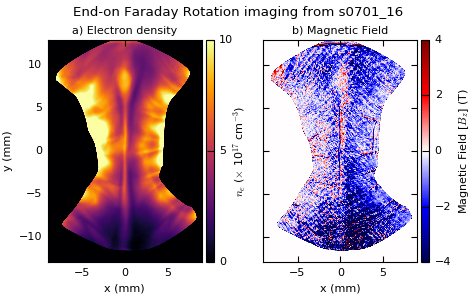

In [50]:
fig, ax=plt.subplots(1,2, figsize=(5.96,3.7), sharey=True)
ne_im=ax[0].imshow(ne.data_c/1.6e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
mag_im=ax[1].imshow(b_map, extent=b.extent, clim=[-4,4], cmap='seismic')

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('a) Electron density', fontsize=10)
ax[1].set_title('b) Magnetic Field', fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10, labelpad=-2)


divider1 = make_axes_locatable(ax[1])
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(mag_im, cax=c, ticks
             =[-4, -2,0,2,4])
c.set_ylabel(r'Magnetic Field [$B_z$] (T)',fontsize=10)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.88,
                wspace=0.3, hspace=0.1)

#colour bars
for c in [cbar_ax0,cbar_ax1]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("End-on Faraday Rotation imaging from s0701_16", fontsize=12)

In [63]:
xx=3
yy=8
w=4
b.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=w*b.scale)


import copy
bzoom=copy.copy(b)
bzoom.set_origin(s.origin, extent=[yy-2,yy+2,-xx,xx])

(295, 354) (295, 708)


<IPython.core.display.Javascript object>


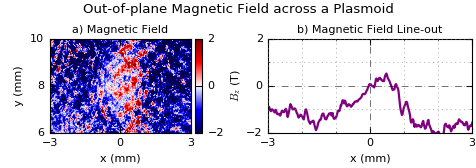

In [52]:

clim=[-2,2]

fig, ax=plt.subplots(1,2, figsize=(5.96,2.1))
mag_im=ax[0].imshow(bzoom.data_c, extent=[-xx,xx,yy-w/2,yy+w/2], clim=clim, cmap='seismic')
ax[1].plot(b.mm,b.lo, lw=2, c='purple')

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-xx,0,xx])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
ax[0].set_yticks([yy-w/2,yy,yy+w/2])
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('a) Magnetic Field', fontsize=10)

ax[1].set_xlim([-xx,xx])
ax[1].set_ylim(clim)
ticks=[clim[0],0,clim[1]]
ax[1].set_yticks(ticks)

ax[1].xaxis.set_minor_locator(MultipleLocator(1))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].grid(which='minor', color='gray',linestyle=':')
ax[1].grid(which='major',linestyle='--')
ax[1].set_title('b) Magnetic Field Line-out', fontsize=10)

divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(mag_im, cax=c, ticks=ticks)
c.set_ylabel(r'$B_z$ (T)',fontsize=10, labelpad=+5)

plt.subplots_adjust(left=0.05, bottom=0.21, right=0.99, top=0.77,
                wspace=0.2, hspace=0.1)

#colour bars
for c in [cbar_ax0]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
fig.suptitle("Out-of-plane Magnetic Field across a Plasmoid", fontsize=12)

<IPython.core.display.Javascript object>


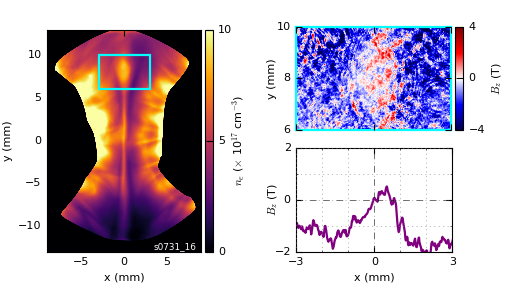

In [130]:
fig=plt.figure(figsize=(6.5,3.7))

bottom=0.15
height=0.75
#lb,w,h
ax0=fig.add_axes([0.05, bottom, 0.4, height])

ne_im=ax0.imshow(ne.data_c/1.6e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)


ax0.set_xlabel('x (mm)',fontsize=10)
ax0.set_xticks([-5,0,5])
ax0.tick_params(labelsize=10, pad=5, length=5, width=1)
ax0.set_ylabel('y (mm)',fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax0)
cbar_ax0 = divider0.append_axes("right", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10, labelpad=-2)



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.88,
                wspace=0.3, hspace=0.1)

cbar_ax0.tick_params(labelsize=10, pad=5, length=6, width=1)
    

clim=[-4,4]

ax1=fig.add_axes([0.57, 0.55, 0.32, 0.37])
ax2=fig.add_axes([0.57, bottom, 0.3, 0.35])


mag_im=ax1.imshow(bzoom.data_c, extent=[-xx,xx,yy-w/2,yy+w/2], clim=clim, cmap='seismic')
ax2.plot(b.mm,b.lo, lw=2, c='purple')

ax=[ax1,ax2]

#labels and ticks
for a in ax:
    #a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-xx,0,xx])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)

    
ax2.set_xlabel('x (mm)',fontsize=10)
    
ax[0].set_yticks([yy-w/2,yy,yy+w/2])
ax[0].set_xticklabels([])
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].yaxis.labelpad = 0


ax[1].set_xlim([-xx,xx])
ax[1].set_ylim([-2,2])
ax[1].set_yticks([-2,0,2])
ax[1].set_ylabel(r'$B_z$ (T)',fontsize=10)
ax[1].yaxis.labelpad = -5


ax[1].xaxis.set_minor_locator(MultipleLocator(1))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].grid(which='minor', color='gray',linestyle=':')
ax[1].grid(which='major',linestyle='--')

divider1 = make_axes_locatable(ax1)
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(mag_im, cax=c, ticks=[-4,0,4])
c.set_ylabel(r'$B_z$ (T)',fontsize=10, labelpad=+5)

plt.subplots_adjust(left=0.05, bottom=0.21, right=0.99, top=0.77,
                wspace=0.2, hspace=0.1)

#colour bars
for c in [cbar_ax1]:
    c.tick_params(labelsize=10, pad=5, length=6, width=1)
    
#fig.suptitle("Out-of-plane Magnetic Field in a Plasmoid", fontsize=12)

import matplotlib.patches as patches

# Create a Rectangle patch
rect = patches.Rectangle((-3,6),6,4,linewidth=2,edgecolor='cyan',facecolor='none')

# Add the patch to the Axes
ax0.add_patch(rect)

#plt.setp(ax1.spines.values(), color='cyan')
#plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

for spine in ax1.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(2)

ax0.text(s='s0731_16', x=8.5, y=-13, fontsize=8, ha='right', va='bottom',color='white')


In [131]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='plasmoid_out_of_plane.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Al B profile

In [453]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION"
d=np.genfromtxt('s0506_15_averaged_Bfield_and_neL_lineout_vs_y_(t_214ns_zav_over_12p5mm).dat', skip_header=2, delimiter=',')
x=d[:,0]
B_profile=d[:,1]

from lmfit import Model
def Harris(x, x0, B0, delta,C):
    return B0*np.tanh((x-x0)/delta)+C

hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(B_profile, x=x)

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION


C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


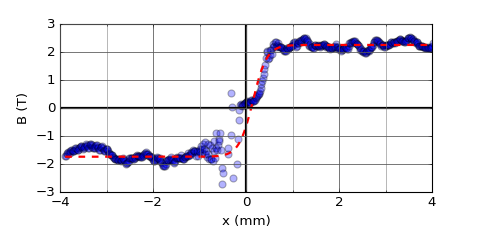

In [481]:
fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(x, -B_profile, s=40, alpha=0.3)
ax.plot(x, -res.best_fit, c='red', ls='--', lw=2)
ax.plot([0,0],[-3,3], c='k', lw=2)
ax.plot([-4,4],[0,0], c='k', lw=2)


ax.set_xlim([-4,4])
ax.set_ylim([-3,3])

#ax.set_yticks([-4,-2,0,2,4])
ax.set_xticks([-4,-2,0,2,4])


ax.set_xlabel('x (mm)')
ax.set_ylabel('B (T)')


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.grid(which='minor', color='gray', ls='-')
ax.grid(which='major', color='k',ls='-')

fig.subplots_adjust(bottom=0.2)

ax.text(s='s0812_16', x=1.0, y=50, fontsize=8, ha='right', va='top')


In [482]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='Al_B_profile.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Vertical Thomson

In [412]:
%cd "~\Google Drive\MAGPIE\conferences\mr2017"
csvfile='s0812_16 Vz T_i.dat'

data=np.genfromtxt(csvfile, delimiter=',', skip_header=2)

x_pos=data[:,0]
v_z=data[:,1]
T_i=data[:,2]

C:\Users\jdhare\Google Drive\MAGPIE\conferences\mr2017


<IPython.core.display.Javascript object>


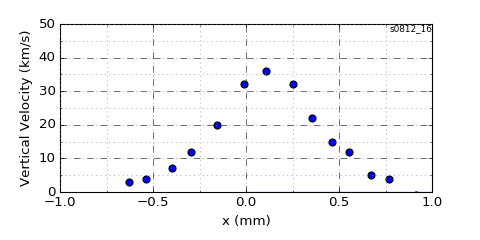

In [413]:
fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(x_pos, v_z, s=40)
ax.plot([0,0])

ax.set_xlim([-1,1])
ax.set_ylim([0,50])

ax.set_xlabel('x (mm)')
ax.set_ylabel('Vertical Velocity (km/s)')


ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.grid(which='minor', color='gray',linestyle=':')
ax.grid(which='major',linestyle='--')

fig.subplots_adjust(bottom=0.2)

ax.text(s='s0812_16', x=1.0, y=50, fontsize=8, ha='right', va='top')


In [172]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='velocity_out_of_plane.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

In [414]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION"
d=np.genfromtxt('s0506_15_averaged_Bfield_and_neL_lineout_vs_y_(t_214ns_zav_over_12p5mm).dat', skip_header=2, delimiter=',')
x=d[:,0]
B_profile=d[:,1]

from lmfit import Model
def Harris(x, x0, B0, delta,C):
    return B0*np.tanh((x-x0)/delta)+C

hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(B_profile, x=x)


C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION


In [452]:
x_B=x-res.best_values['x0']
B_profile=B_profile-res.best_values['C']

hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res_0=hm.fit(B_profile, x=x_B)

In [416]:
import scipy.constants as cons

def Harris_j(x, x0, B0, delta):
    return B0/(cons.mu_0*delta*(np.cosh((x-x0)/delta))**2)

C=0
x0=0
B0=res_0.best_values['B0']
delta=res_0.best_values['delta']

In [417]:
%cd "~\Google Drive\MAGPIE\data\2015\s0609_15"

s0609_15_532=NeLMap2('s0609_15 532nm neL.txt', scale=173, rot_angle=-90, multiply_by=1/1.6)
s=s0609_15_532


C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0609_15


In [418]:
s.set_origin(origin=(1999,1450), extent=[-11.5,11.5,-8,8])
s.create_lineout(start=(0,-4), end=(0,4), lineout_width=2*s.scale)

(1989, 692) (1989, 2076)


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


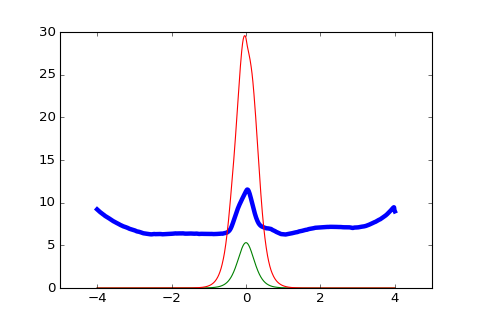

In [419]:
j=Harris_j(s.mm*1e-3,0,B0,delta*1e-3)
u_ed=-j/(cons.e*s.lo*1e6)
fig, ax=plt.subplots(figsize=(6,4))
s.plot_lineout(ax=ax, multiply_by=1e-17)
ax.plot(s.mm,-j*1e-9)
ax.plot(s.mm, u_ed*1e-3)

C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


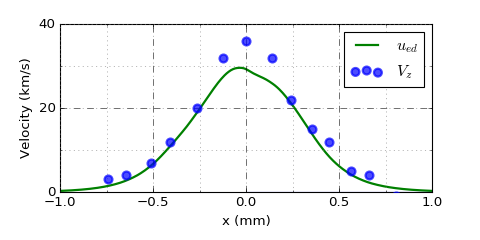

In [428]:
fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(x_pos-0.11, v_z, s=50, lw=2, label=r'$V_z$', color='blue', zorder=5, alpha=0.7)
ax.plot(s.mm, u_ed*1e-3, c='green', lw=2, label=r'$u_{ed}$')

ax.plot([0,0])

ax.set_xlim([-1,1])
ax.set_ylim([0,40])
ax.set_yticks([0,20,40])

ax.set_xlabel('x (mm)')
ax.set_ylabel('Velocity (km/s)')


ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.grid(which='minor', color='gray',linestyle=':')
ax.grid(which='major',linestyle='--')

fig.subplots_adjust(bottom=0.2)
ax.legend()

#ax.text(s='s0812_16', x=1.0, y=50, fontsize=8, ha='right', va='top')


In [429]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='velocity_out_of_plane.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


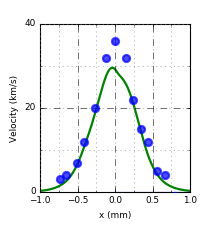

In [430]:
fig,ax=plt.subplots(figsize=(2.5,3))
ax.scatter(x_pos-0.11, v_z, s=40, lw=2, label=r'$V_z$', color='blue', zorder=5, alpha=0.7)
ax.plot(s.mm, u_ed*1e-3, c='green', lw=2, label=r'$u_{ed}$')

ax.plot([0,0])

ax.set_xlim([-1,1])
ax.set_ylim([0,40])
ax.set_yticks([0,20,40])

ax.set_xlabel('x (mm)', fontsize=fs)
ax.set_ylabel('Velocity (km/s)', fontsize=fs)


ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.grid(which='minor', color='gray',linestyle=':')
ax.grid(which='major',linestyle='--')

fig.subplots_adjust(bottom=0.2)
ax.tick_params(labelsize=fs)
fig.subplots_adjust(bottom=0.2, left=0.2, right=0.95)


#ax.legend()

In [431]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='velocity_out_of_plane_thin.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


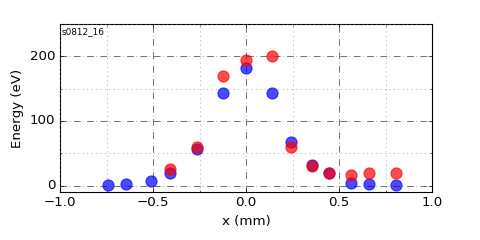

In [422]:
E_k=27/2*cons.m_u/cons.e*(v_z*1e3)**2

fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(x_pos-0.11, E_k, s=100, label=r'$E_{kin}$', color='blue', zorder=5, alpha=0.7)
ax.scatter(x_pos-0.11, T_i, s=100, label=r'$T_i$', color='red', zorder=5, alpha=0.7)

ax.set_xlim([-1,1])
ax.set_ylim([-10,250])
ax.set_yticks([0,100,200])

ax.set_xlabel('x (mm)')
ax.set_ylabel('Energy (eV)')


ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(50))

ax.grid(which='minor', color='gray',linestyle=':')
ax.grid(which='major',linestyle='--')

fig.subplots_adjust(bottom=0.2)
#ax.legend()

ax.text(s='s0812_16', x=-0.99, y=245, fontsize=8, ha='left', va='top')

In [423]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='E_kin_vs_T_i_for_Kz_TS.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

<IPython.core.display.Javascript object>


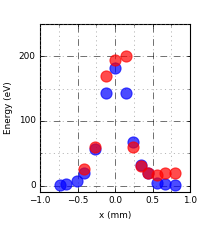

In [404]:
fs=8

E_k=27/2*cons.m_u/cons.e*(v_z*1e3)**2

fig,ax=plt.subplots(figsize=(2.5,3))
ax.scatter(x_pos-0.11, E_k, s=100, label=r'$E_{kin}$', color='blue', zorder=5, alpha=0.7)
ax.scatter(x_pos-0.11, T_i, s=100, label=r'$T_i$', color='red', zorder=5, alpha=0.7)

ax.set_xlim([-1,1])
ax.set_ylim([-10,250])
ax.set_yticks([0,100,200])

ax.set_xlabel('x (mm)', fontsize=fs)
ax.set_ylabel('Energy (eV)', fontsize=fs)

ax.tick_params(labelsize=fs)

ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(50))

ax.grid(which='minor', color='gray',linestyle=':')
ax.grid(which='major',linestyle='--')

fig.subplots_adjust(bottom=0.2, left=0.2, right=0.95)



In [405]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='E_kin_vs_T_i_for_Kz_TS_thin.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

# Radiative Collapse

In [406]:
%cd "~\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS"

s0215_17_355=NeLMap2('s0215_17 355nm neL.txt', scale=178, rot_angle=-90+0.7, multiply_by=1/1.6)
s=s0215_17_355
s.set_origin(origin=(2610,1620), extent=[-11.5,11.5,-8,8])


C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [407]:
s0215_17_532=NeLMap2('s0215_17 532nm neL.txt', scale=178, rot_angle=-90, multiply_by=1/1.6)
s=s0215_17_532
s.set_origin(origin=(2440,1793), extent=[-11.5,11.5,-8,8])


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


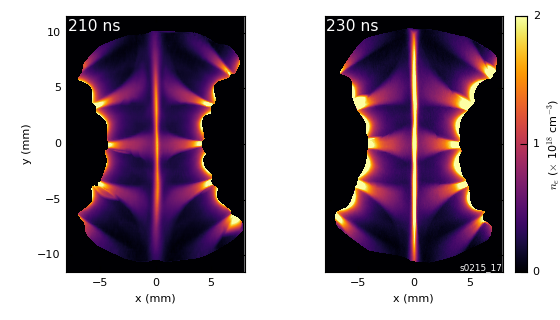

In [408]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(7, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )


clim=[0,2]

s0215_17_532.plot_data_mm(ax=grid[0], clim=clim, multiply_by=1e-18)
bim=s0215_17_355.plot_data_mm(ax=grid[1], clim=clim, multiply_by=1e-18)

for a in grid:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
grid[0].set_ylabel('y (mm)', fontsize=10)

c=grid[1].cax.colorbar(bim, ticks=[0,1 ,2])
#grid[1].cax.toggle_label(True)
c.set_label_text(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
c.ax.tick_params(labelsize=10, pad=5, length=6, width=1)

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.08, right=0.98, wspace=0.3, hspace=0)

grid[1].text(s='s0215_17', x=8, y=-11.5, fontsize=8, ha='right', va='bottom',color='white')
grid[0].text(s='210 ns', x=-7.9, y=+11.2, fontsize=14, ha='left', va='top',color='white')
grid[1].text(s='230 ns', x=-7.9, y=+11.2, fontsize=14, ha='left', va='top',color='white')


In [409]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='rapid_equilibriation_ne_maps.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

C:\Users\jdhare\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


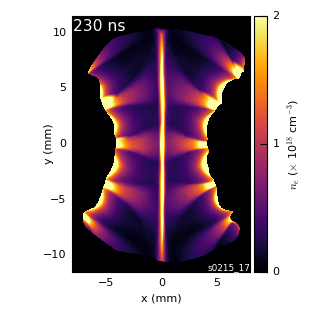

In [441]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(4, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,1),
                 axes_pad=1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.05,
                 )


clim=[0,2]

bim=s0215_17_355.plot_data_mm(ax=grid[0], clim=clim, multiply_by=1e-18)

for a in grid:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
grid[0].set_ylabel('y (mm)', fontsize=10, labelpad=-10)

c=grid[0].cax.colorbar(bim, ticks=[0,1 ,2])
#grid[1].cax.toggle_label(True)
c.set_label_text(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
c.ax.tick_params(labelsize=10, pad=5, length=6, width=1)

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.08, right=0.98, wspace=0.3, hspace=0)

grid[0].text(s='s0215_17', x=8, y=-11.5, fontsize=8, ha='right', va='bottom',color='white')
grid[0].text(s='230 ns', x=-7.9, y=+11.2, fontsize=14, ha='left', va='top',color='white')


In [442]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='Al_ne_map.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

(1513, 890) (1513, 1958)
(1513, 890) (1513, 1958)


<IPython.core.display.Javascript object>


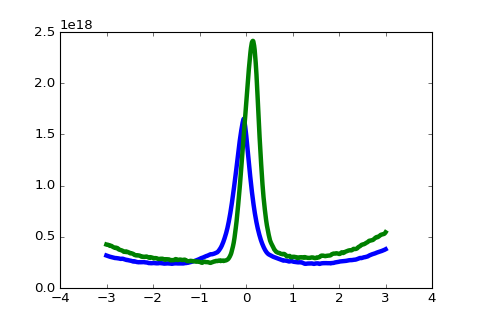

In [410]:
yy=3

start=(yy,-3)
end=(yy,3)
lw=1
s0215_17_532.create_lineout(start=start, end=end, lineout_width=s0215_17_532.scale*lw)
s0215_17_355.create_lineout(start=start, end=end, lineout_width=s0215_17_532.scale*lw)

fig, ax=plt.subplots(figsize=(6,4))
s0215_17_532.plot_lineout(ax=ax)
s0215_17_355.plot_lineout(ax=ax)

(267, 1424) (3827, 1424)
(267, 1424) (3827, 1424)


<IPython.core.display.Javascript object>


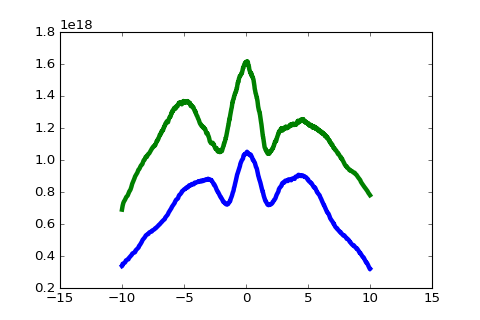

In [411]:
start=(10,0)
end=(-10,0)
lw=1
s0215_17_532.create_lineout(start=start, end=end, lineout_width=s0215_17_532.scale*lw)
s0215_17_355.create_lineout(start=start, end=end, lineout_width=s0215_17_532.scale*lw)

fig, ax=plt.subplots(figsize=(6,4))
s0215_17_532.plot_lineout(ax=ax)
s0215_17_355.plot_lineout(ax=ax)

# Equilibriation
Ryutov, D. D. (2015). Characterizing the Plasmas of Z-Pinches. IEEE Transactions on Plasma Science, 43(8), 2363–2384. http://doi.org/10.1109/TPS.2015.2453265

eqn A1, A4, A5.

In [369]:
A=27
n_e=8e17
T_e=40
T_i=400
Z=7.4
CL=6
tau_e=1/(2.91e-6*n_e*CL*T_e**-1.5)
tau_ei_E=A*cons.m_p/(2*cons.m_e)*tau_e
tau=T_i/(Z*(T_i-T_e))*tau_ei_E
print(tau*1e9)

67.40996309196967


In [370]:
3*cons.m_e**0.5/(4*(2*cons.pi)**2*cons.e**4)

2.7517213946308956e+58

# Plasmoid Instability

<IPython.core.display.Javascript object>


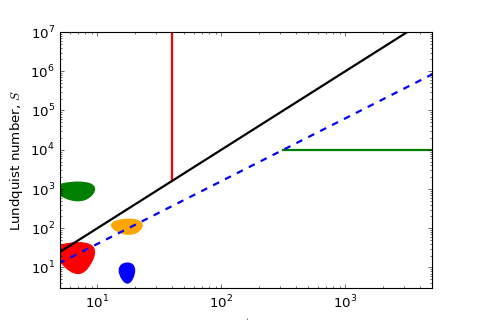

In [216]:
L_di=np.logspace(0,5,10000)
upper=L_di**2
lower=L_di**(8/5)

L_dic=40
S_c=1e4

fig, ax=plt.subplots(figsize=(6,4))
ax.loglog([L_dic,L_dic], [L_dic**2, 1e7], c='red', lw=2)
ax.loglog([S_c**(5/8),1e5], [S_c,S_c], c='green', lw=2)
ax.loglog(L_di, upper, c='black', lw=2)
ax.loglog(L_di, lower, c='blue', ls='--', lw=2)

ax.set_xlim([5,5e3])
ax.set_ylim([3,1e7])

ax.set_xlabel(r'$L/d_i$', fontsize=12)
ax.set_ylabel(r'Lundquist number, $S$', fontsize=12)

from matplotlib.patches import Ellipse

Hare17={'L_di_S':(18,120), 'w':10, 'h':100, 'angle':0, 'label':'Hare, 2017', 'c':'orange'}
Suttle16={'L_di_S':(17.5,8.5), 'w':5, 'h':9, 'angle':0, 'label':'Suttle, 2016', 'c':'blue'}
JJA16={'L_di_S':(7,25), 'w':5, 'h':36, 'angle':0, 'label':'Jara-Almonte, 2016', 'c':'red'}
Olson16={'L_di_S':(7,1000), 'w':5, 'h':1000, 'angle':0, 'label':'Olson, 2016', 'c':'green'}



ells=[Hare17, Suttle16, JJA16, Olson16]

for e in ells:
    e=Ellipse(xy=e['L_di_S'], width=e['w'], height=e['h'], angle=e['angle'], color=e['c'])
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)